In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal','Height','Width']].to_numpy()

In [5]:
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

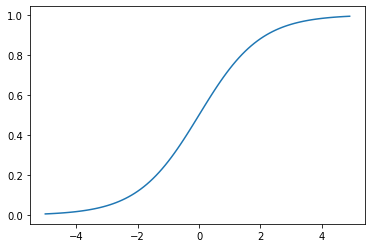

In [10]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1/ (1+np.exp(-z))
plt.plot(z, phi)

In [11]:
char_arr = np.array(['A','B','C','D','E'])
char_arr[[True, False, True, False, False]]

array(['A', 'C'], dtype='<U1')

In [12]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [14]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [15]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [17]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [18]:
lr.coef_, lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

In [21]:
decisions = lr.decision_function(train_bream_smelt[:5])

In [22]:
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [28]:
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [29]:
lr.score(train_scaled, train_target)

0.9327731092436975

In [30]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

# 확률적 경사하강법

In [37]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()
fish_input = fish[['Weight', 'Length', 'Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()


In [40]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(fish_input, fish_target, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [46]:
#SGD Classifier
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter = 10, random_state=42)
sc.fit(train_scaled, train_target)



/home/ubuntu/Study/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [47]:
sc.score(train_scaled, train_target)

0.773109243697479

In [48]:
sc.score(test_scaled, test_target)

0.775

In [49]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [50]:
sc.score(train_scaled, train_target)

0.8151260504201681

In [51]:
sc.score(test_scaled, test_target)

0.85

In [53]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


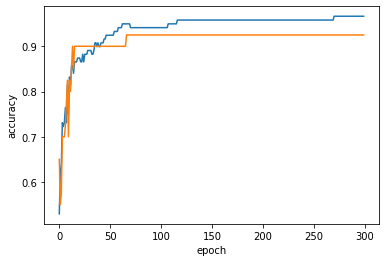

In [56]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()